In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

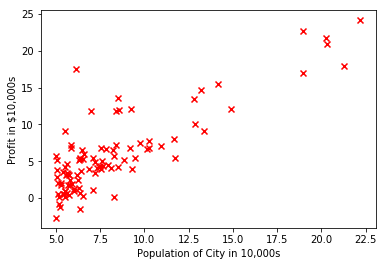

In [19]:
# Plotting Data

def plotData(x, y):
    plt.scatter(x, y, c = 'r', marker = 'x', label = 'Training data')
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000s')

data = np.loadtxt('ex1data1.txt', delimiter = ',')
X_orig = data[:, 0]
y_orig = data[:, 1]
m = len(y_orig)

plotData(X_orig, y_orig)

In [20]:
# Cost

def computeCost(x, y, theta):
    m = len(y)
    J = np.sum(np.square(np.dot(x, theta) - y)) / (2 * m)
    
    return J
            
X = np.c_[np.ones((m, 1)), X]
y = y_orig.reshape(len(y_orig),1)

theta = np.zeros((2,1))
iterations = 1500
alpha = 0.01

J = computeCost(X, y, theta)
print('Wiht theta = [0 ; 0]\nCost computed = %f\n' %J)

Wiht theta = [0 ; 0]
Cost computed = 32.072734



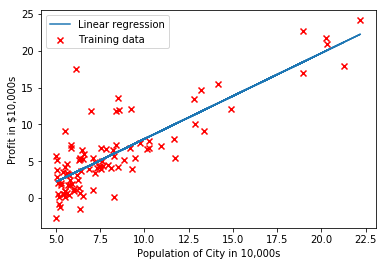

In [21]:
# Gredient descent

def gredientDescent(x, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []
    
    for iter in range(num_iters):
        theta = theta - alpha * np.dot(x.T, (np.dot(x, theta) - y)) / m
        J_history.append(computeCost(x, y, theta))
        
    return theta, J_history

theta, J_history = gredientDescent(X, y, theta, alpha, iterations)
plotData(X_orig, y_orig)
plt.plot(X_orig, np.dot(X, theta), label = 'Linear regression')
plt.legend()

Text(0.5, 0, '$\\theta_1$')

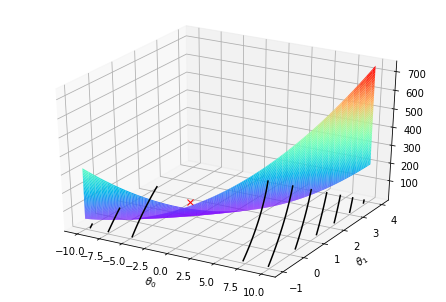

In [22]:
# Visualizing J

theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([theta0_vals[i], theta1_vals[j]]).reshape(2, 1)
        J_vals[i, j] = computeCost(X, y, t)

fig = plt.figure() 
ax = Axes3D(fig)
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap = 'rainbow')
ax.contour(theta0_vals, theta1_vals, J_vals, offset = -1, colors = 'black')
ax.plot(theta[0], theta[1], 50, c = 'r', marker = 'x', )
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')